In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label_train_file = '../data/train/Label.parquet'
label_validate_file = '../data/validate/Label.parquet'
label_train = pd.read_parquet(label_train_file)
label_validate = pd.read_parquet(label_validate_file)

In [3]:
label_train

,epoch_time,label
0,1490431583000,4
1,1490431584000,4
2,1490431585000,4
3,1490431586000,4
4,1490431587000,4
...,...,...
980522,1499267848000,5
980523,1499267849000,5
980524,1499267850000,5
980525,1499267851000,5


In [4]:
label_validate

,epoch_time,label
0,1497427492000,3
1,1497427493000,3
2,1497427494000,3
3,1497427495000,3
4,1497427496000,3
...,...,...
143953,7497460755000,2
143954,7497460756000,2
143955,7497460757000,2
143956,7497460758000,2


In [22]:
label_train_duration = label_train.groupby('label')['epoch_time'].count().reset_index(name='duration')
label_train_duration['duration'] = label_train_duration['duration']/3600
label_train_duration

,label,duration
0,1,33.972500
1,2,34.101667
2,3,11.743333
3,4,32.611944
4,5,44.081944
5,6,39.345278
6,7,43.405556
7,8,33.106389


In [28]:
label_validate_duration = label_validate.groupby('label')['epoch_time'].count().reset_index(name='duration')
label_validate_duration['duration'] = label_validate_duration['duration']/3600
label_validate_duration

,label,duration
0,1,8.287778
1,2,7.263611
2,3,0.770556
3,4,3.341944
4,5,5.686944
5,6,2.549444
6,7,6.057778
7,8,6.030278


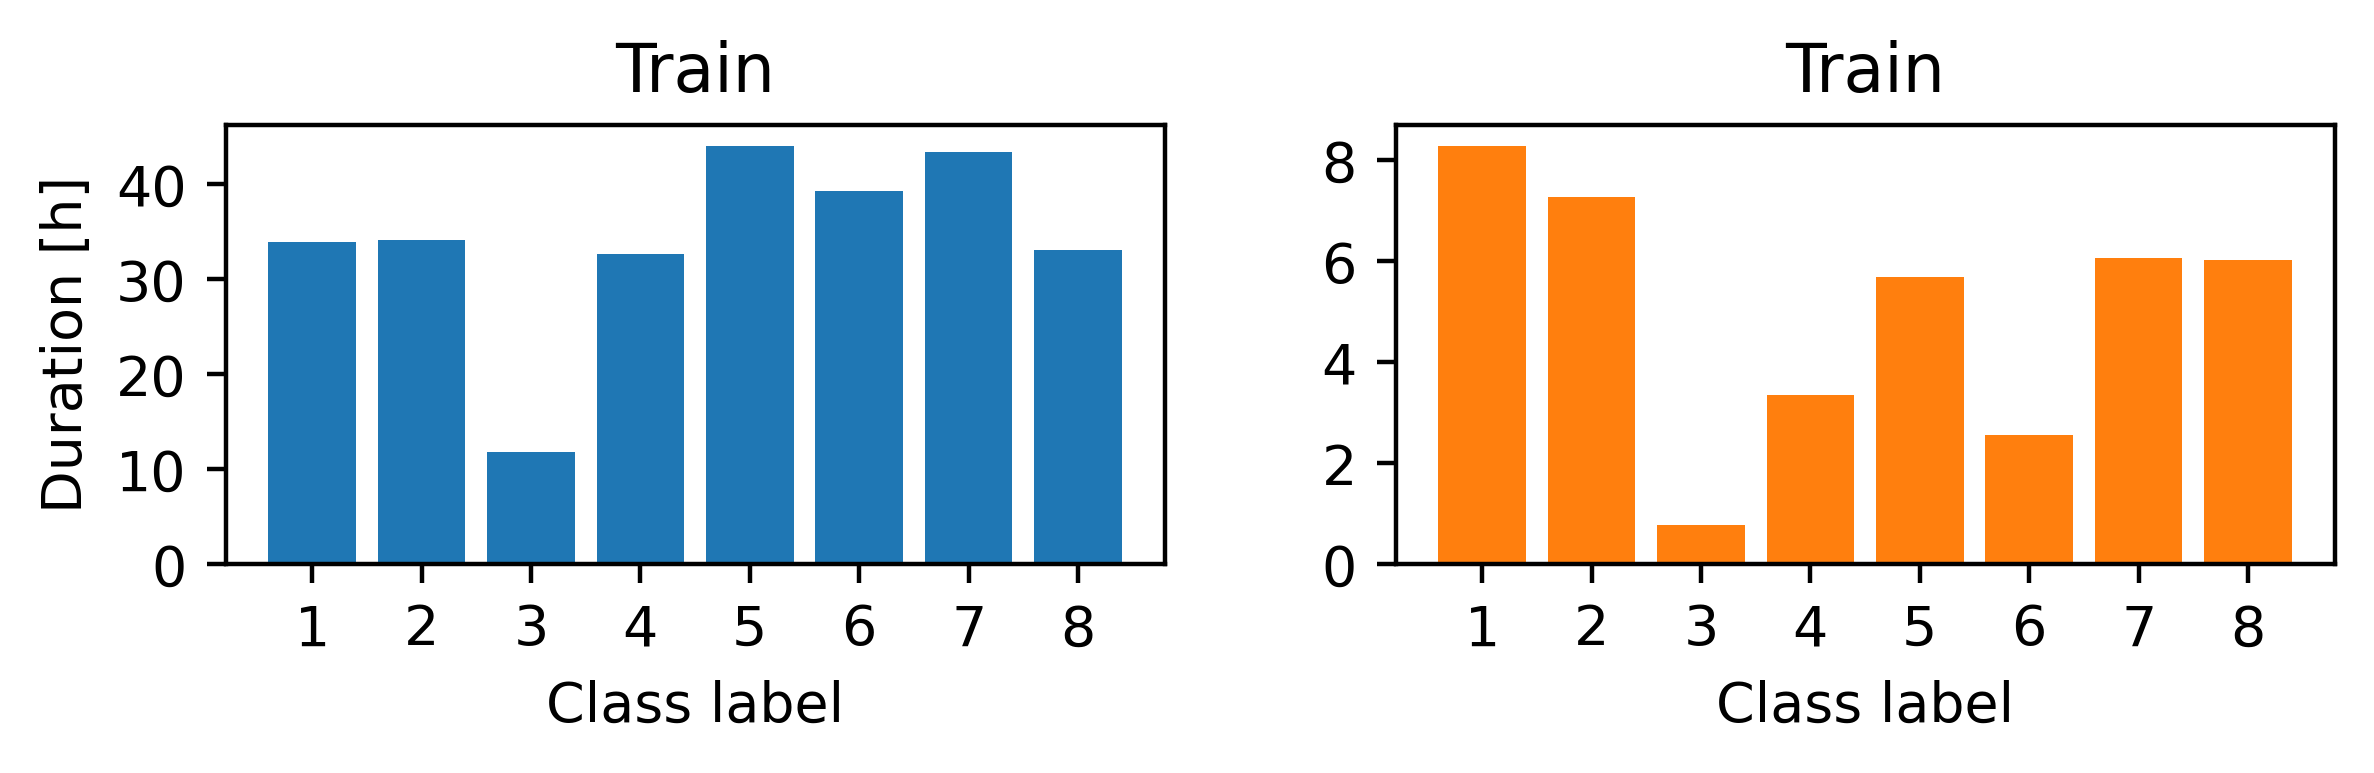

In [45]:
dpi=400
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=dpi, figsize=(6,3))
fig.tight_layout()

ax = plt.subplot(221)
ax.bar(label_train_duration['label'], label_train_duration['duration'], label='Train', color=colors[0])
ax.set(xticks=label_train_duration['label'].unique())
ax.set(yticks=np.arange(0, 50, step=10)) 
ax.set(ylabel='Duration [h]', xlabel='Class label', title='Train')

ax = plt.subplot(222)
ax.bar(label_validate_duration['label'], label_validate_duration['duration'], label='Validate', color=colors[1])
ax.set(xticks=label_validate_duration['label'].unique())
ax.set(yticks=np.arange(0, 10, step=2)) 
ax.set(xlabel='Class label', title='Train')
plt.savefig('../data/plots/labels_stats.png', dpi=dpi, bbox_inches='tight')
plt.show()